In [11]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')

# Display the first few rows of the dataset
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


Missing values in each column:
 Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

Summary Statistics:
               Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
coun

C:\Users\Kanta. Sai Dhanush\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


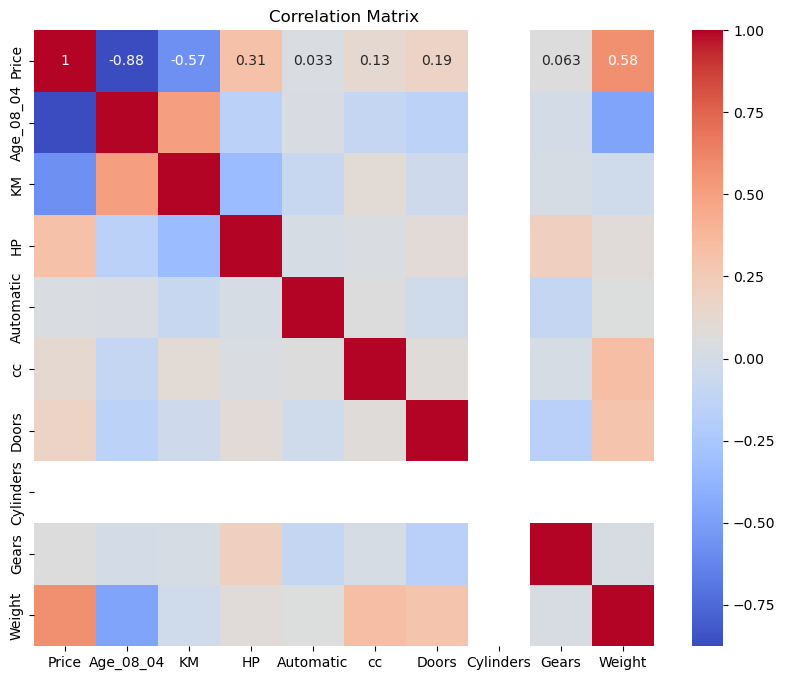

C:\Users\Kanta. Sai Dhanush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


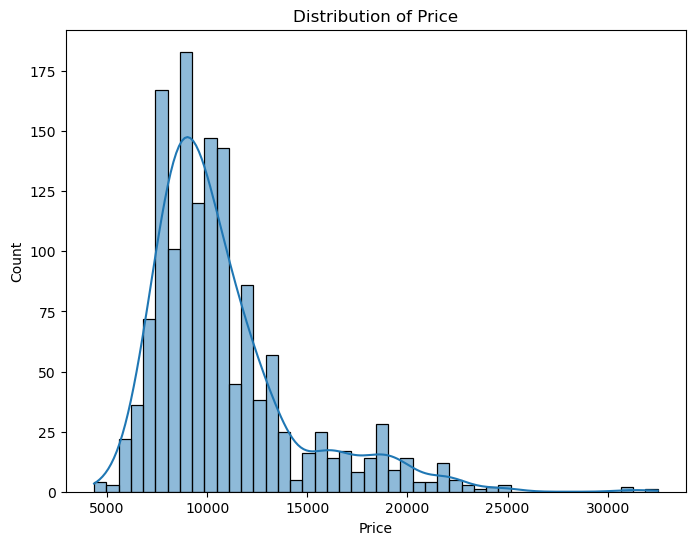

In [13]:
# Task 1: EDA and Data Preprocessing

# Checking for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Summary statistics of the dataset
print("\nSummary Statistics:\n", df.describe())

# Visualize correlations between numerical variables
numerical_columns = ['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Distribution of the target variable (Price)
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of Price")
plt.show()

# Preprocessing - OneHotEncoding for categorical variable (Fuel_Type)
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [15]:
# Task 2: Splitting the Dataset
X = df.drop(['Price'], axis=1)  # Features
y = df['Price']                 # Target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train,X_test,y_train,y_test)

      Age_08_04      KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
899          62   59295   86          0  1300      5          4      5   
881          68   61568  110          0  1600      4          4      5   
310          40   38653  110          0  1600      5          4      5   
1145         75  101855  110          0  1600      5          4      5   
31           22   35199   97          0  1400      3          4      5   
...         ...     ...  ...        ...   ...    ...        ...    ...   
1095         76  125778  110          0  1600      3          4      5   
1130         73  107108  110          0  1600      3          4      5   
1294         80   71740  110          0  1600      5          4      5   
860          63   64690   86          0  1300      3          4      5   
1126         80  110000  110          0  1600      4          4      5   

      Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
899     1035             False              True  
881     1

In [16]:
# Task 3: Building Multiple Linear Regression Models

# Model 1: Basic Linear Regression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Model 2: Linear Regression with Standardization
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])
model_2 = pipe.fit(X_train, y_train)

# Model 3: Linear Regression with Interaction Terms (Polynomial Features)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_3 = LinearRegression()
model_3.fit(X_train_poly, y_train)

# Coefficients of the models
print("\nCoefficients of Model 1:\n", model_1.coef_)
print("\nCoefficients of Model 2:\n", model_2.named_steps['linear'].coef_)
print("\nCoefficients of Model 3 (with interaction terms):\n", model_3.coef_)


Coefficients of Model 1:
 [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01 -1.10844667e-12  5.51600710e+02
  2.58849583e+01 -6.85487568e+01  1.37080891e+03]

Coefficients of Model 2:
 [-2.26729478e+03 -6.11654412e+02  2.08349858e+02  3.43971298e+01
 -1.41619166e+01 -5.74678039e+01 -1.70530257e-13  1.09340417e+02
  1.31681831e+03 -2.17221726e+01  4.58047731e+02]

Coefficients of Model 3 (with interaction terms):
 [-1.08988660e+08 -4.15391587e-02 -5.36340059e+02  2.49962256e+02
  3.64893868e+01 -1.18154632e+03  5.06874159e-04  2.53514739e+03
  1.67709203e+01  2.80708739e+02 -1.28467628e+02  2.78400165e-04
  6.35734690e-01  2.84107291e+01 -8.08601201e-02  1.34688766e+01
  2.72471942e+07  1.56847405e+02 -9.09333969e-01  5.13736502e+01
 -5.94988889e+01 -1.67449155e-04 -8.17905522e-04 -7.72311807e-06
 -3.96243843e-03 -5.57402644e-02 -3.03565416e-03  2.44530040e-04
  1.16559938e-02  3.59625024e-02  5.73113079e+01  2.04403186e-02
 -1.03591204e+

In [17]:
# Task 4: Evaluate Model Performance

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print()

# Evaluating each model
evaluate_model(model_1, X_test, y_test, "Model 1 (Basic Linear Regression)")
evaluate_model(model_2, X_test, y_test, "Model 2 (Standardized Linear Regression)")
evaluate_model(model_3, X_test_poly, y_test, "Model 3 (Polynomial Features)")

Model 1 (Basic Linear Regression) Performance:
RMSE: 1484.27
R^2 Score: 0.83

Model 2 (Standardized Linear Regression) Performance:
RMSE: 1484.27
R^2 Score: 0.83

Model 3 (Polynomial Features) Performance:
RMSE: 1713.23
R^2 Score: 0.78



Lasso Regression Performance:
RMSE: 1484.00
R^2 Score: 0.83

Ridge Regression Performance:
RMSE: 1484.16
R^2 Score: 0.83



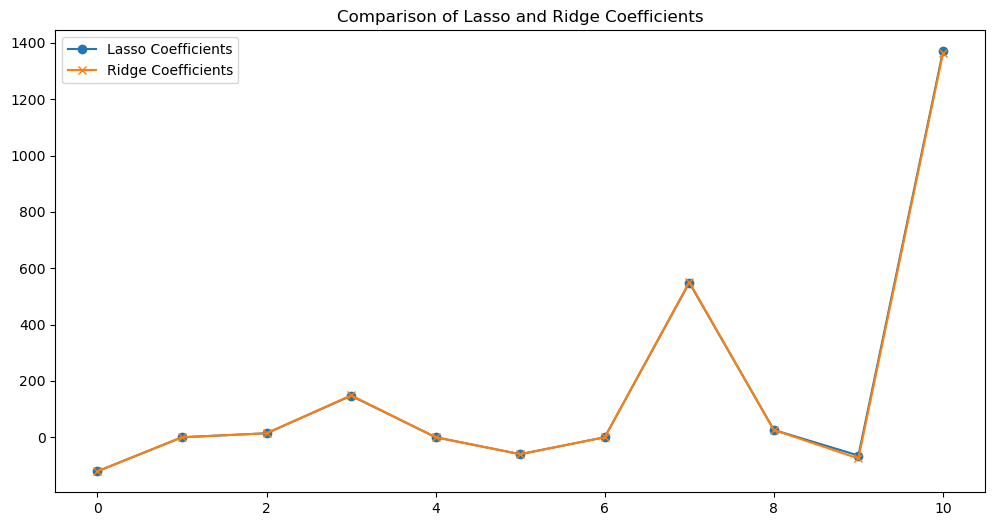

In [18]:
# Task 5: Applying Lasso and Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate_model(lasso, X_test, y_test, "Lasso Regression")

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
evaluate_model(ridge, X_test, y_test, "Ridge Regression")

# Visualizing the coefficients of Lasso and Ridge
plt.figure(figsize=(12, 6))
plt.plot(range(len(lasso.coef_)), lasso.coef_, label="Lasso Coefficients", marker='o')
plt.plot(range(len(ridge.coef_)), ridge.coef_, label="Ridge Coefficients", marker='x')
plt.title("Comparison of Lasso and Ridge Coefficients")
plt.legend()
plt.show()

## INTERVIEW QUESTIONS
### Normalization & Standardization and Their Importance:
#### Normalization scales data to a range (e.g., [0, 1]), while standardization rescales data to have a mean of 0 and a standard deviation of 1. Both techniques help improve model performance by ensuring features have similar scales, preventing dominance by certain features in machine learning models.

### Techniques to Address Multicollinearity in Multiple Linear Regression:
#### Multicollinearity can be addressed by removing highly correlated predictors, using dimensionality reduction techniques like Principal Component Analysis (PCA), or applying regularization methods like Ridge or Lasso regression.